<a href="https://colab.research.google.com/github/HenriqueCSilva/Magnificent-Seven-Support-Prices-Analysis/blob/main/stocks_support_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite o ticker da ação (ex: PETR4.SA): MSFT34.SA


/tmp/ipython-input-4216269399.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed


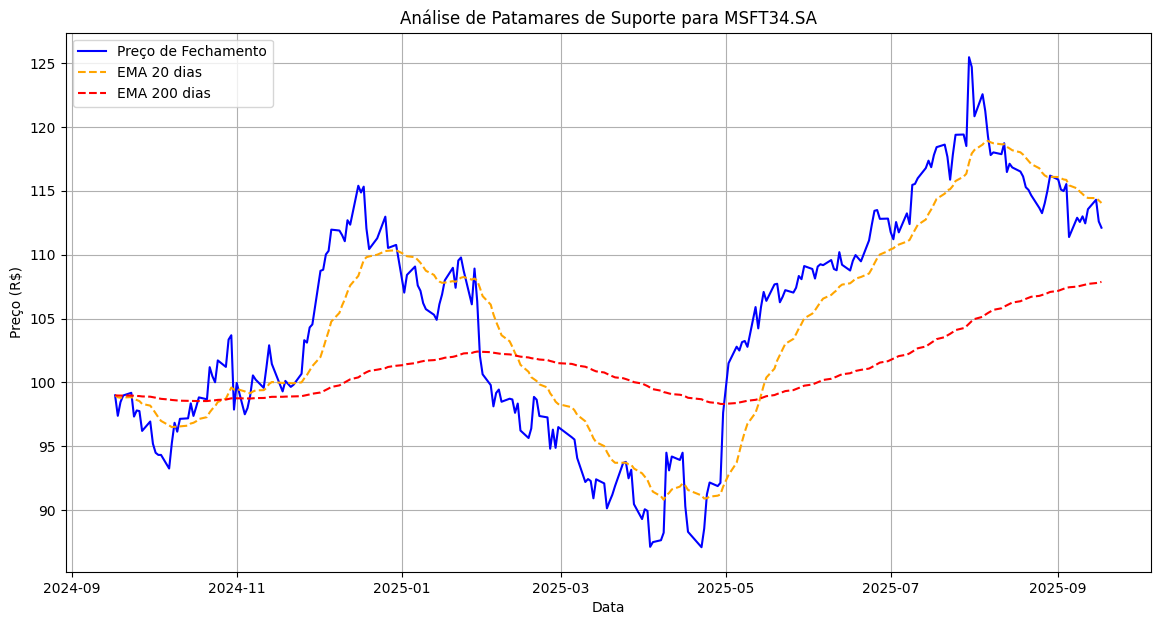


--- Análise para o ticker MSFT34.SA ---
Último Preço de Fechamento: R$112.11
Última EMA de 200 dias: R$107.87

* O preço da ação está ACIMA da EMA de 200 dias. Isso pode indicar uma tendência de alta de longo prazo.
* A EMA de 200 dias em R$107.87 pode se tornar um patamar de SUPORTE.


In [4]:
# 1. Instalar as bibliotecas necessárias
!pip install yfinance pandas matplotlib

# 2. Importar as bibliotecas
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 3. Função para analisar a ação
def analisar_acao(ticker):
    """
    Analisa uma ação, calcula as EMAs e plota o gráfico.
    Args:
        ticker (str): O ticker da ação (ex: 'PETR4.SA').
    """
    # 3.1. Baixar os dados históricos da ação
    # Usamos o período de 1 ano ('1y') para ter dados suficientes para as EMAs
    try:
        dados = yf.download(ticker, period='1y')
        if dados.empty:
            print(f"Não foi possível encontrar dados para o ticker {ticker}.")
            return
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados: {e}")
        return

    # 3.2. Calcular as Médias Móveis Exponenciais (EMAs)
    # A função .ewm() do pandas calcula a EMA
    dados['EMA_20'] = dados['Close'].ewm(span=20, adjust=False).mean()
    dados['EMA_200'] = dados['Close'].ewm(span=200, adjust=False).mean()

    # 3.3. Plotar o gráfico para visualização
    plt.figure(figsize=(14, 7))

    # Preços de fechamento da ação
    plt.plot(dados.index, dados['Close'], label='Preço de Fechamento', color='blue')

    # EMAs calculadas
    plt.plot(dados.index, dados['EMA_20'], label='EMA 20 dias', color='orange', linestyle='--')
    plt.plot(dados.index, dados['EMA_200'], label='EMA 200 dias', color='red', linestyle='--')

    # Configurações do gráfico
    plt.title(f'Análise de Patamares de Suporte para {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3.4. Interpretação e análise
    print(f"\n--- Análise para o ticker {ticker} ---")

    ultimo_preco = dados['Close'].iloc[-1]
    ultima_ema_200 = dados['EMA_200'].iloc[-1]

    print(f"Último Preço de Fechamento: R${ultimo_preco.item():.2f}")
    print(f"Última EMA de 200 dias: R${ultima_ema_200.item():.2f}")

    if ultimo_preco.item() < ultima_ema_200.item():
        print(f"\n* O preço da ação está ABAIXO da EMA de 200 dias. Isso pode indicar uma tendência de baixa de longo prazo.")
        print(f"* A EMA de 200 dias em R${ultima_ema_200.item():.2f} pode se tornar um patamar de RESISTÊNCIA.")
    elif ultimo_preco.item() >= ultima_ema_200.item():
        print(f"\n* O preço da ação está ACIMA da EMA de 200 dias. Isso pode indicar uma tendência de alta de longo prazo.")
        print(f"* A EMA de 200 dias em R${ultima_ema_200.item():.2f} pode se tornar um patamar de SUPORTE.")

# 4. Inserir o Ticker da ação
# Lembre-se de adicionar '.SA' para ações da B3 (Bolsa de Valores do Brasil)
ticker_desejado = input("Digite o ticker da ação (ex: PETR4.SA): ").upper()

# 5. Rodar a análise
analisar_acao(ticker_desejado)